
## Exploratory Data Analysis

In this notebook you will get familiar with some data exploration steps what we have discussed up to now. Here we will use a well-known dataset often used for machine learning and statistical analysis projects related to diabetes prediction "**Pima Indians Diabetes Database**"




# About the dataset

The dataset is available on [Kaggle](https://https://www.kaggle.com/), a popular platform for data science competitions and projects.

The dataset contains various attributes or features associated with individuals, particularly from India, who have been diagnosed as either diabetic or non-diabetic. Each row typically represents one individual, and each column represents a specific attribute or characteristic.

The objective of the dataset is to diagnostically **predict whether or not a patient has diabetes, based on certain diagnostic measurements** included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Inspiration

Can you understand the data and do a comprehensive Exploratory Data Analysis?


Ok. Let's start!
This the plan
1. Load python packages
2. Load dataset by using Pandas
3. Check the data content and dimentions
4. Then take a closer look on statistical summary of data
5. Data cleaning and preprocessing
6. Exploring relationships between features(corraltions)
7. Identify patterns and outliars



# 1. Load Python packages

First you need to import all the packages/libraries use for the notebook.
This tutorial assumes Python version 3.6+.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 2. Load dataset by using Pandas

Since we run the code from google colab, let's load the data from CBM101 git repository as following.

Note: If you run the notebook in your machine locally, you can load the dataset by giving local path for the dataset.

```
df = pd.read_csv('/your path to directory/diabetes.csv')
```



In [2]:
url = "https://raw.githubusercontent.com/thilinib/CBM101/main/assets/diabetes.csv"
df = pd.read_csv(url)

Now the pandas .csv file is transformed to a python data structure DataFrame.

# 3. Check the data content and dimentions

In [3]:
# check the shape of the data
df.shape

(768, 9)

In [4]:
# check how dataset looks like
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Another important method is *info()* which gives a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [5]:
# check the data types and general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#change Glucose Dtype
df.Glucose = df.Glucose.astype(object)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    object 
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In info table check the 'Dtype'. Here we are expecting to see int or float but not object type. So let's revert back.

In [8]:
df.Glucose = df.Glucose.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 4. statistical summary of data

In [9]:
# check the summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In descriptive statistic we can see,


*   **Count**: The count column indicates the number of non-null values for each variable. In this dataset, there are 768 observations for each variable, suggesting that there are no missing values.
*   **Mean (Average)**: The mean represents the average value of each variable across all observations. For example, the mean number of pregnancies is approximately 3.85, the mean glucose level is around 120.89 mg/dL, and so forth.

*   **min :** we have zeros which is strange in case of glucose level, blood pressure, skin thickness, insulin level and BMI.
*   **max: ** Also there is some big values like skin thickness and insulin.


*   **Standard Deviation (Std):** The standard deviation measures the dispersion or variability of values around the mean. A higher standard deviation indicates greater variability in the data. For instance, variables like insulin and blood pressure have relatively high standard deviations compared to others, suggesting wider variability in their values.
*   **Percentiles (25th, 50th, 75th):** These percentiles provide insights into the distribution and spread of the data. If the mean and median(50th) are close to each other, it suggests that the data is approximately symmetrically distributed and likely has low skewness. However, if the mean is significantly larger or smaller than the median, it indicates skewness in the data like Insulin.




It is always good to check this info.


Do we have features that can dominate others in magnitude?
DO we need to scale the data?

# 5. Data cleaning and preprocessing

Most Machine Learning algorithms cannot work with missing features, so let’s learn how to detect and remove missing variables or impute missing values.

Are there any missing values?

In [10]:
#check null values
df.isnull().values.any()

False

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# missing values (zero values)
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
# missing values (zero values) percentage
(df == 0).mean()

Pregnancies                 0.144531
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.651042
dtype: float64

We can see that there are some features with zero values, so we should think how we can solve this issue. While zero values in variables like "Pregnancies" and "Outcome" are meaningful and not indicative of missing data, for other features such as "Glucose," "BloodPressure," "SkinThickness," "Insulin," and "BMI," zero values could indeed signal missing or invalid data that require careful handling, such as imputation or removal.

the choice between imputation and removal of missing or invalid data depends on various factors including the distribution of the data and the specific objectives of the analysis.

Now let's see how we solve this issue step by step. First lets concern features with high probabilities.

In [14]:
# check the shape after dropping the rows with zero values
df[(df.BloodPressure != 0) & (df.SkinThickness != 0) & (df.Insulin != 0)].shape

(394, 9)

In [15]:
# calculate the percentage of the data after dropping the rows with zero values.
df[(df.BloodPressure != 0) & (df.SkinThickness != 0) & (df.Insulin != 0)].shape[0] / df.shape[0]

0.5130208333333334

We can check duplicates and scatter matrix and then decide what we are going to do with zero values

In [16]:
# check duplicates
df.duplicated().sum()

0

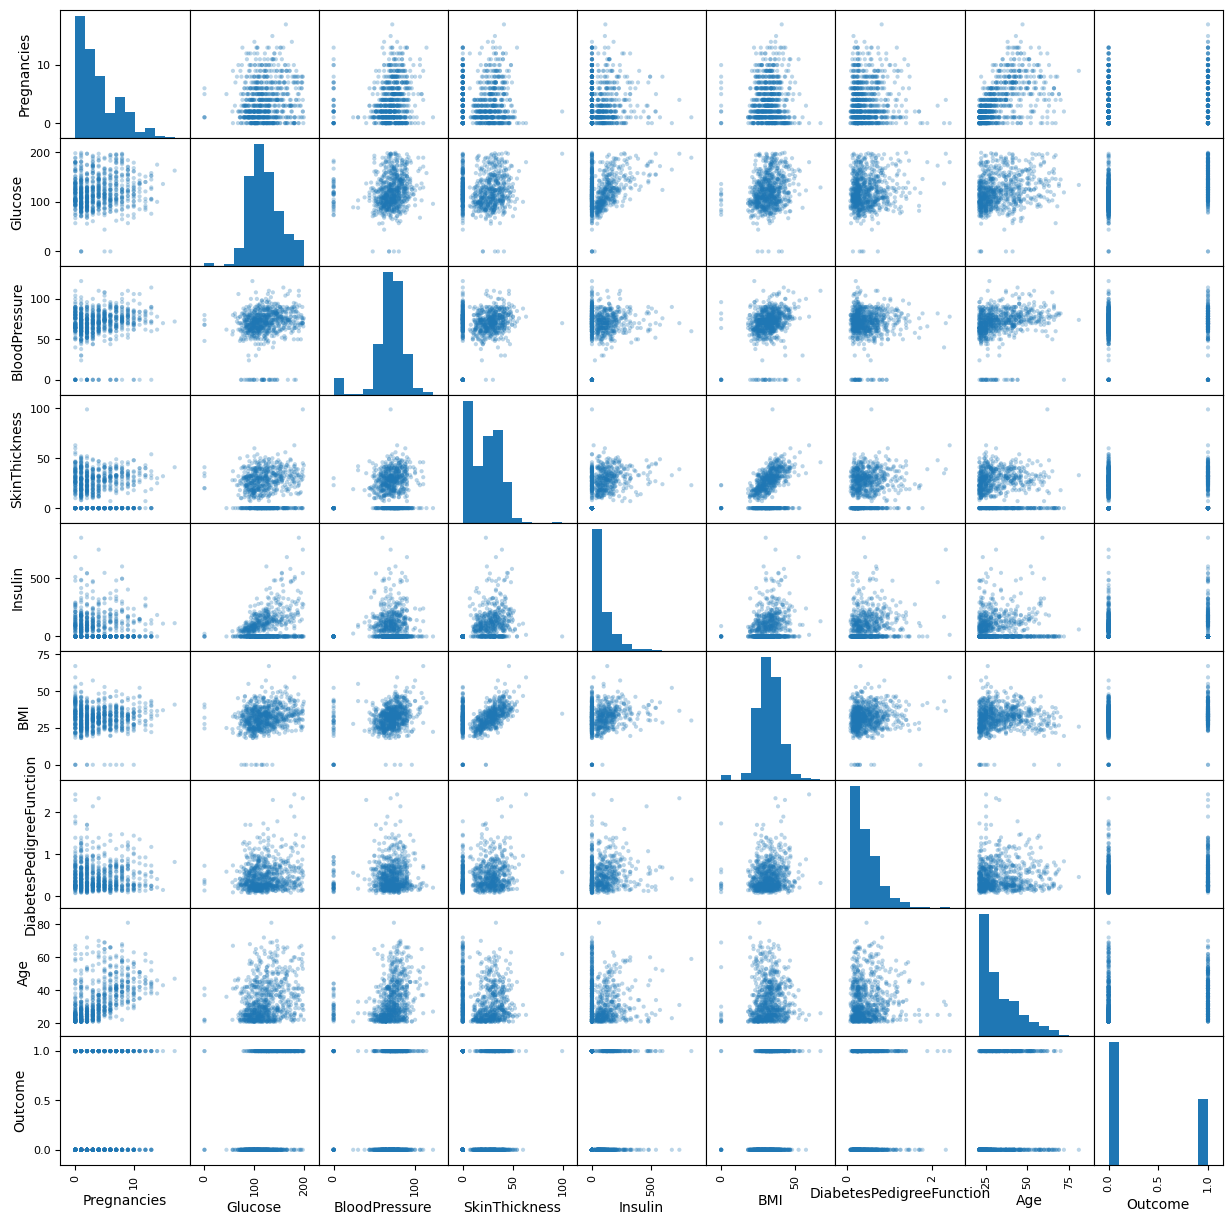

In [17]:
# check scatter matrix
pd.plotting.scatter_matrix(df, figsize=(15,15), range_padding=0.3, alpha=0.3);

On scatterplots we can clearly see "saturation" of zeros. So it makes sence to remove observations with a lot of zeros. Let's first do for SkinThickness and Insulin.

In [18]:
# let's drop the rows with zero values
df = df[(df.SkinThickness != 0) & (df.Insulin != 0)]

In [19]:
# check the amount of missing values (zero values) after dropping the rows
(df == 0).sum()

Pregnancies                  57
Glucose                       1
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           1
DiabetesPedigreeFunction      0
Age                           0
Outcome                     264
dtype: int64

In [20]:
# check the percentage of missing values (zero values) after dropping the rows
(df == 0).mean()

Pregnancies                 0.144670
Glucose                     0.002538
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
BMI                         0.002538
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.670051
dtype: float64

Looks like we have removed most of them

You can use the dataset as now or if you wish you can remove remaining zero values in Glucose and BMI. Since here we have very few samples we can do iputation. There are lot of ways to impute data. But here we simply impute the missing values by each feature mean.

Following is an example for Glucose zero values imputation

In [21]:
# Calculate the mean of 'Glucose' excluding zero values
glucose_mean = df[df['Glucose'] != 0]['Glucose'].mean()

# Impute missing values (zero values) in 'Glucose' with the calculated mean
df['Glucose'] = df['Glucose'].replace(0, glucose_mean)

# Display the DataFrame with imputed values
print(df['Glucose'])

3       89.0
4      137.0
6       78.0
8      197.0
13     189.0
       ...  
753    181.0
755    128.0
760     88.0
763    101.0
765    121.0
Name: Glucose, Length: 394, dtype: float64


In [22]:
# missing values (zero values) percentage
(df == 0).mean()

Pregnancies                 0.144670
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
BMI                         0.002538
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.670051
dtype: float64


You can see there's no any 0 values for Glucose.




Now let's visualize features seperatly.

Visualizations are often used to intuitively understand the distribution of the data.

Histograms can be used to visualize the distribution of continuous data/features. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).

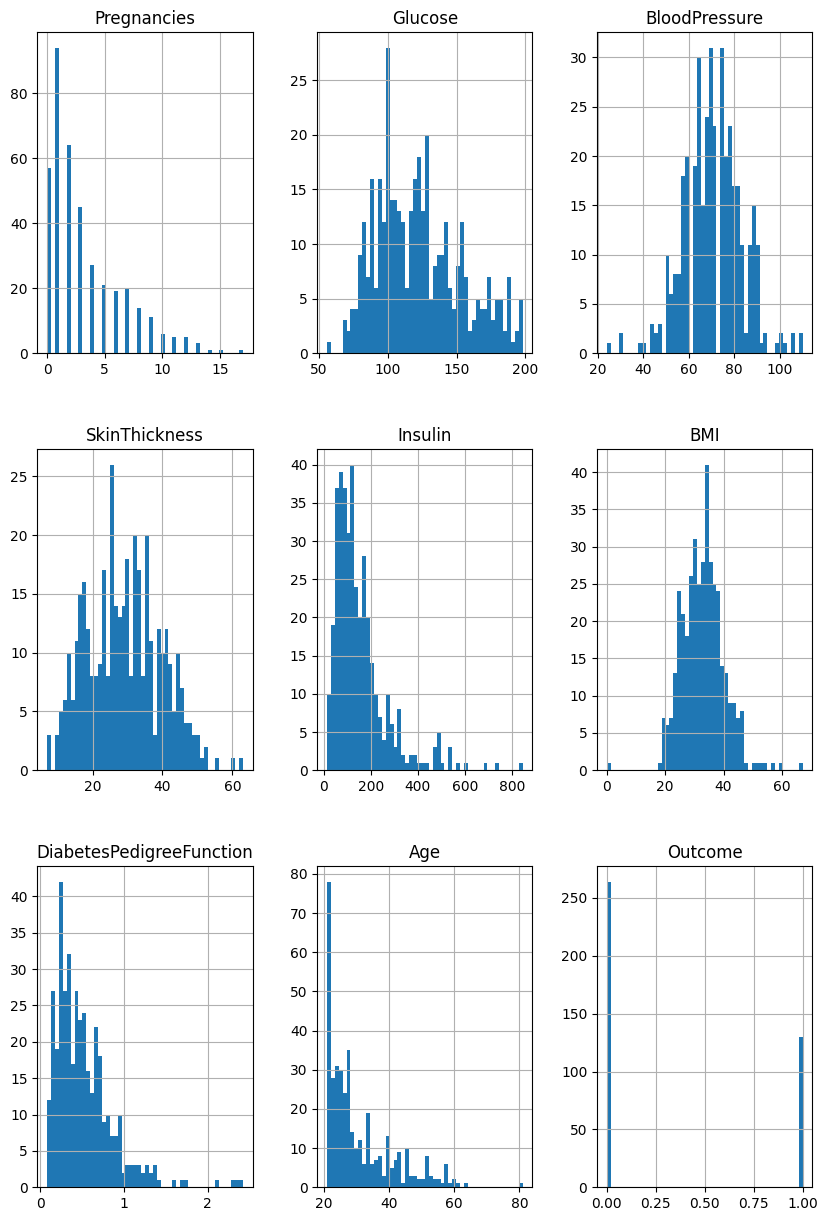

In [23]:
#Plot all values on a frequency graph (showing how often they occur).
df.hist(bins=50, figsize=(10,15))
plt.show()

Low glucose level and blood pressure looks suspicious

In [24]:
# lower limit of the diastolic blood pressure
df.BloodPressure.value_counts().sort_index(ascending=True)

BloodPressure
24      1
30      2
38      1
40      1
44      3
46      2
48      3
50     10
52      6
54      8
56      8
58     18
60     20
62     19
64     28
65      2
66     15
68     24
70     31
72     23
74     31
76     20
78     23
80     17
82     17
84     11
85      2
86     11
88     15
90     11
92      1
94      2
98      1
100     2
102     1
106     2
110     2
Name: count, dtype: int64

Probably we can leave low blood pressure values as they are.

In [25]:
# lower limit of the skin thickness
df.SkinThickness.value_counts().sort_index(ascending=True)

SkinThickness
7      2
8      1
10     3
11     5
12     6
13    10
14     6
15    11
16     5
17    10
18    16
19    12
20     8
21     8
22     9
23    17
24     8
25    12
26    14
27    14
28    13
29    14
30    18
31     8
32    20
33    17
34     8
35    11
36     9
37    11
38     3
39    12
40    10
41    12
42     9
43     5
44     4
45     6
46     7
47     4
48     4
49     3
50     3
51     1
52     2
56     1
60     1
63     1
Name: count, dtype: int64

The same with skin thickness

In [26]:
# lower limit of the glucose
df.Glucose.value_counts().sort_index(ascending=True)

Glucose
56.0     1
68.0     3
71.0     2
74.0     3
75.0     1
        ..
193.0    1
195.0    1
196.0    2
197.0    2
198.0    1
Name: count, Length: 118, dtype: int64

From the counts we can see there's nothing much to worry.

Now lets again see scatter matrix after clean data

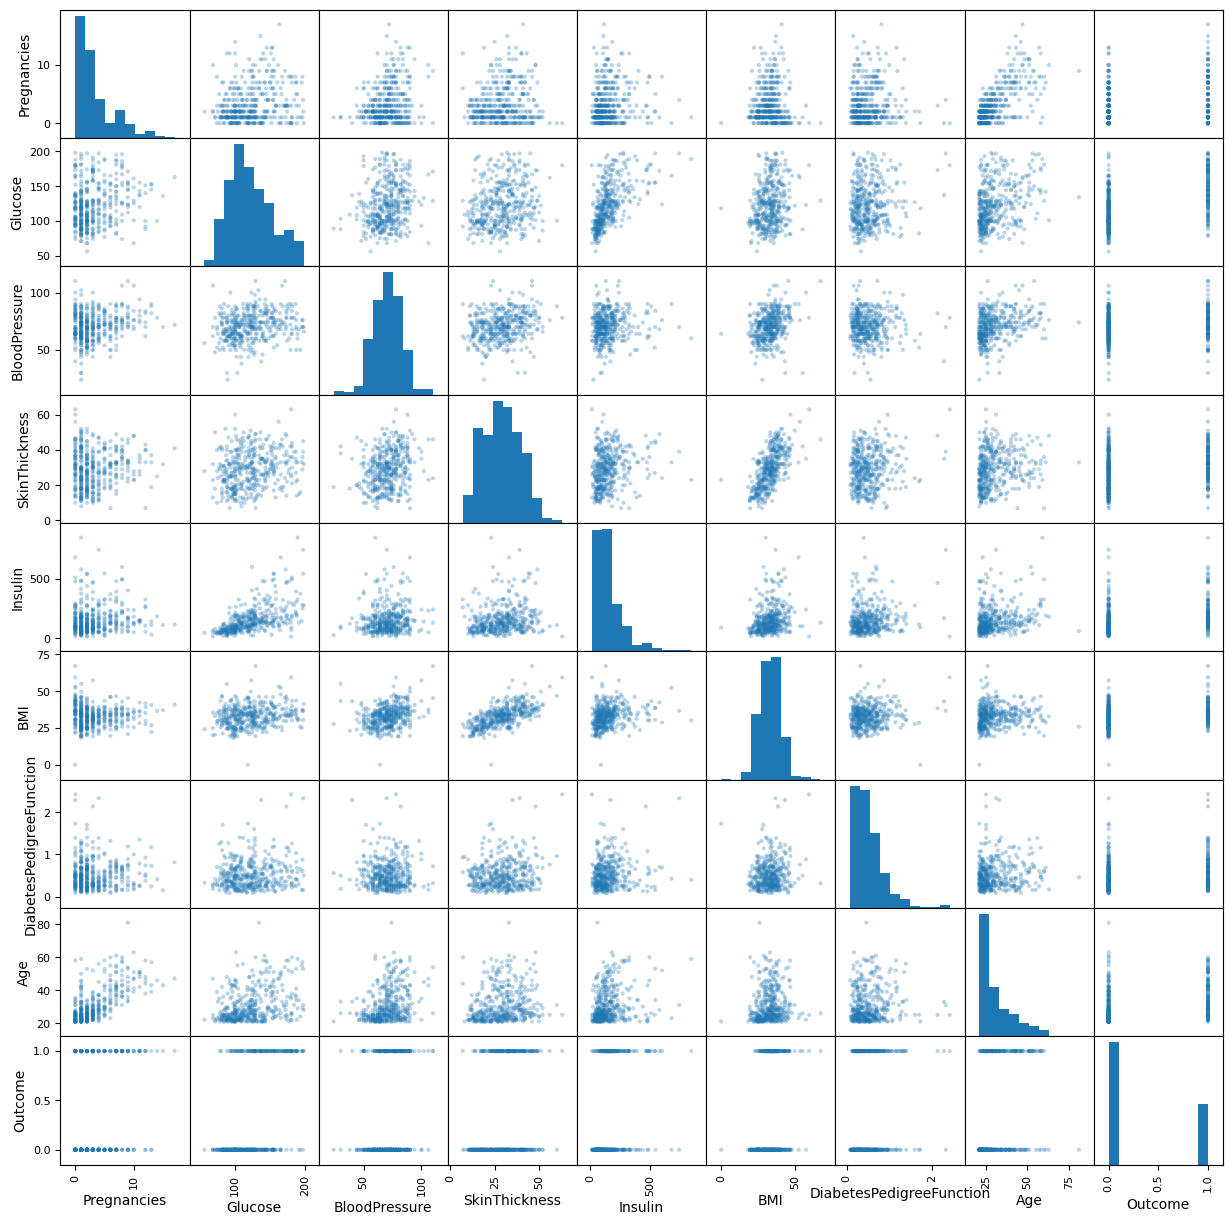

In [27]:
# check scatter matrix after dropping the rows with zero values
pd.plotting.scatter_matrix(df, figsize=(15,15), range_padding=0.3, alpha=0.3);

# 6. Exploring relationships between features(corraltions)

Since the dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the *corr()* method:

> Calculating correlation on large datasets can be very computationally expensive

In [28]:
corr_matrix = df.corr()

Now let’s look at how much each attribute correlates with the outcome feature:

In [29]:
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.515308
Age                         0.352982
Insulin                     0.303454
BMI                         0.271796
Pregnancies                 0.258846
SkinThickness               0.257854
DiabetesPedigreeFunction    0.200759
BloodPressure               0.192819
Name: Outcome, dtype: float64

We can see all have positive correlations with the outcome variable. We can visualize the correlation values for each other simply using a heatmap.

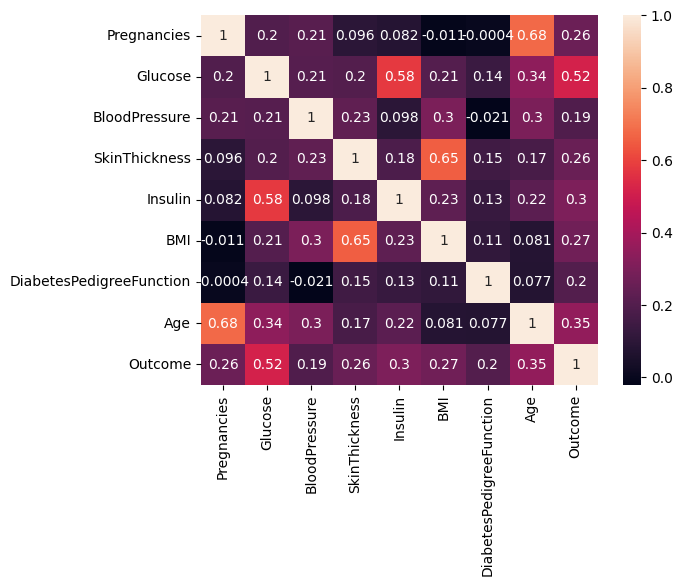

In [30]:
# check the correlation matrix
sns.heatmap(df.corr(), annot=True);

Another way to check for correlation between attributes is to use Pandas’ scatter_matrix function, (we already drew it)which plots every numerical attribute against every other numerical attribute.

# 7. Identify patterns and outliars

In oreder to check existing patterns in dataset, we can use visualization plots like scatter, histogram etc.

Let's see how we can plot distriution of diabetics and non diabetics with each feature.

<ipython-input-31-c608c5da8adf>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = df[feature], hue=df['Outcome'], common_norm = False)


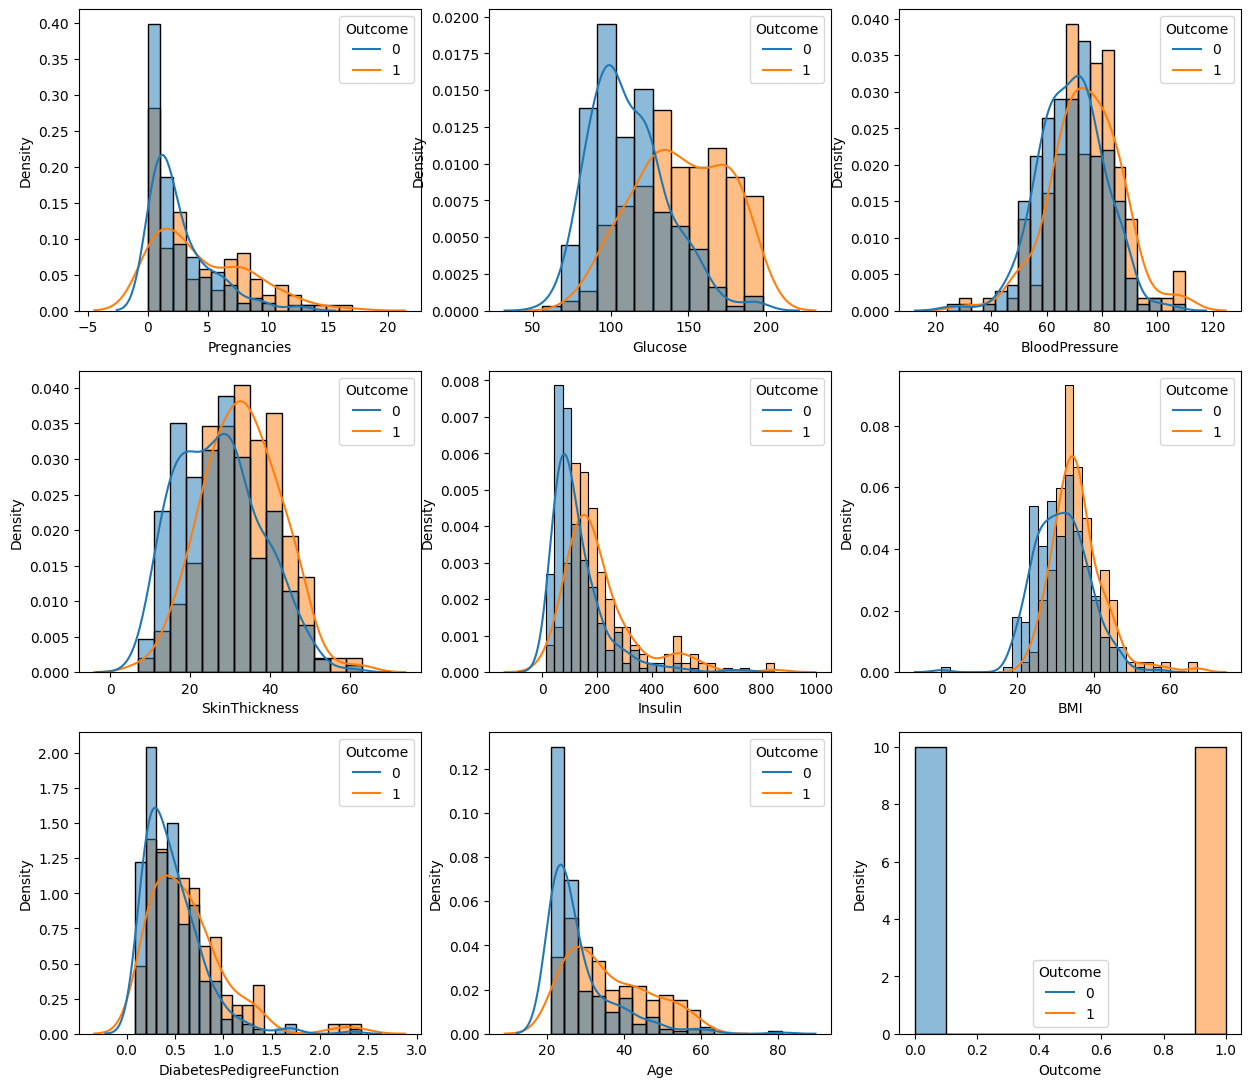

In [31]:
bins = 12
plt.figure(figsize=(15,18))

for i, feature in enumerate(df.columns):
    rows = int(len(df.columns)/2)
    plt.subplot(rows, 3, i+1)
    sns.histplot(df, x = feature, hue='Outcome', common_norm = False, stat='density')
    sns.kdeplot(x = df[feature], hue=df['Outcome'], common_norm = False)

From the statistical summary you have seen the Insulin has a high standard deviation and quartile values. Considering that outliers are clear for Insulin.

For better observation, lets plot bar plots. Box plots can be used\ to review the distribution of each feature’s distribution.





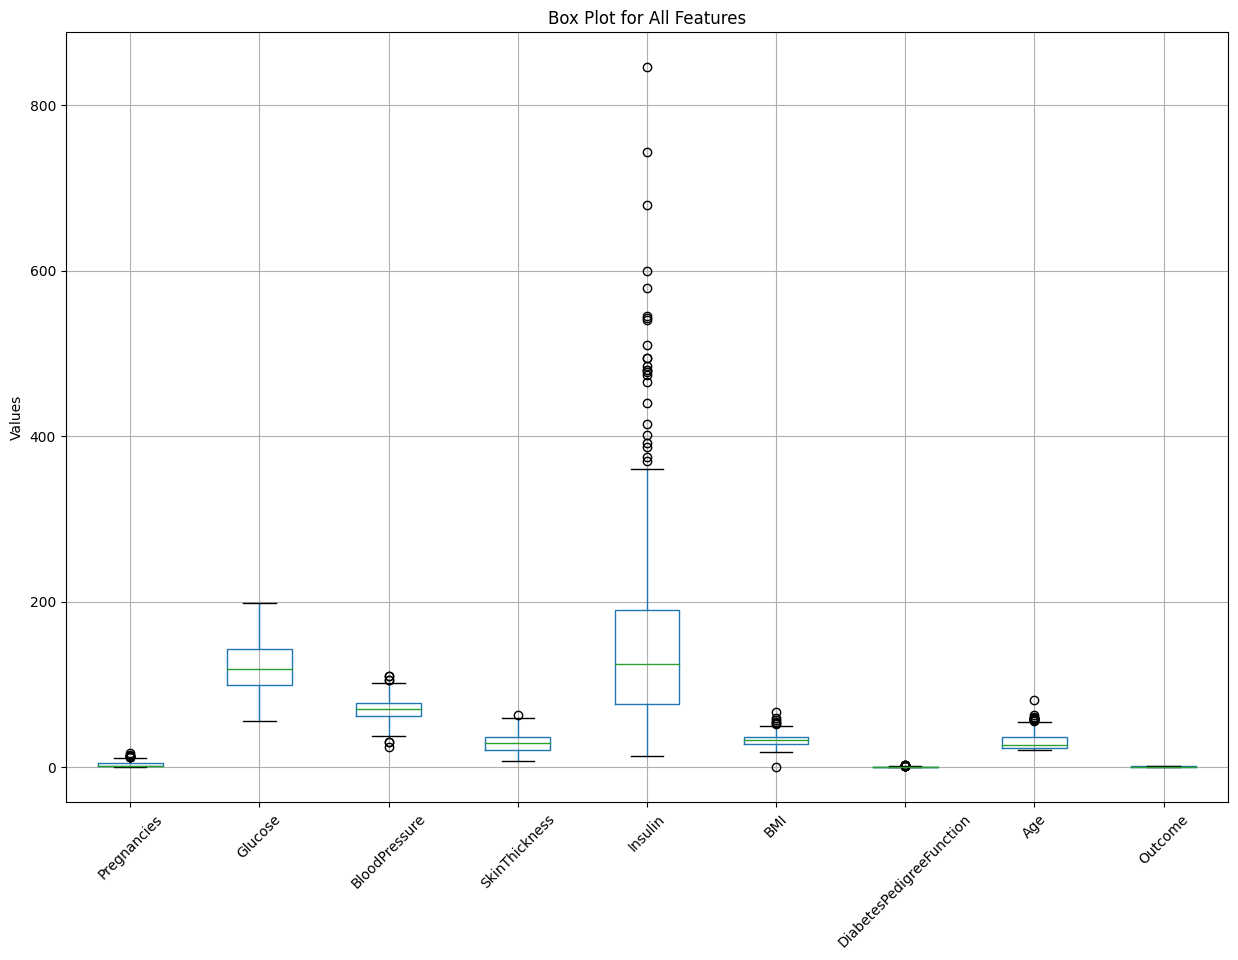

In [32]:
df.boxplot(figsize=(15, 10))
plt.title('Box Plot for All Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Given the presence of outliers in many features, an alternative approach to handling zero values involves imputing them with the median of each respective feature. This strategy allows for the retention of all data points while addressing the outliers, providing a balanced solution for maintaining dataset integrity.

After completing the preprocessing steps, it's a good practice to save the preprocessed dataset for future use in machine learning tasks.

In [33]:
df.to_csv('preprocessed_diabetes.csv', index=False)
